<a href="https://colab.research.google.com/github/anferivera/Programming/blob/main/2_2_algorithms_convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algorithms and Convergence

based in Diego restrepo notebook https://github.com/restrepo/ComputationalMethods

In simple terms, an **algorithm** can be defined as a finite sequence of unambiguous steps that must be followed in order to solve or approximate the solution to some problem. The stated procedure should be translatable into computer code through a programming language.

- - -

- [Types of Algorithms](#Types-of-Algorithms)
    - [Linear algorithms](#Linear-algorithms)
    - [Exponential algorithms](#Exponential-algorithms)
    - [Stable algorithms](#Stable-algorithms)
    - [Unstable algorithms](#Unstable-algorithms)
- [Computing Time](#Computing Time)
- [Convergence](#Convergence)

- - -

There several ways to classify an algorithm, however those that refer to their numerical convergence and accuracy are more interesting. Among them we have:

In [ ]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


- - -

#Types of Algorithms

##Linear algorithms

 They are algorithms where **errors scale as the number of performed iterations**. This definition usually coincides with the `scaling of the time computing`.

**Example 1:**

Consider the recursive equation:

$$ p_n = 2 p_{n-1} - p_{n-2},\ \ \ \ n = 2,3,\cdots $$

the solution to this equation for $p_n$ is given by

$$ p_n = A + Bn $$

for any constants $A$ and $B$.

Setting the initial conditions as $p_0=1$ and $p_1 = 1/3$ (implying $A=1$ and $B=-2/3$), show that a **float32** arithmetics would lead a linear error scaling as the number of iterations $n$.

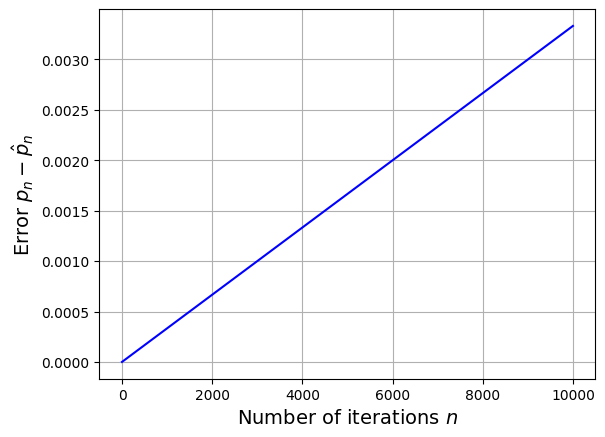

In [ ]:
#Number of iterations
Niter = 10000

#Double precision constants (Exact solution)
A_d = 1.0
B_d = -2/3.
#Single precision constants
A_s = 1.0000000
B_s = -0.666667

#Solution to n-th term
pn = lambda A, B, n: A + B*n

#Arrays for storing the iterations
p_d = []
p_s = []
narray = range(Niter)
for n in narray:
    p_d.append( pn( A_d, B_d, n ) )
    p_s.append( pn( A_s, B_s, n ) )

#Converting to numpy arrays
p_d = np.array(p_d)
p_s = np.array(p_s)

#Relative error
error = p_d - p_s
plt.plot( narray, error, "-", color="blue" )
plt.xlabel("Number of iterations $n$", fontsize=14)
plt.ylabel("Error $p_n-\hat{p}_n$", fontsize=14)
plt.grid(True)

**Example 2:**

A linear algorithm may also refer to the computing time required for performing $n$ iterations. This example evaluates the time required for evaluating the sum of $N$ random numbers as a function of how many number are going to be added. A comparison with the built-in function of python is also performed.

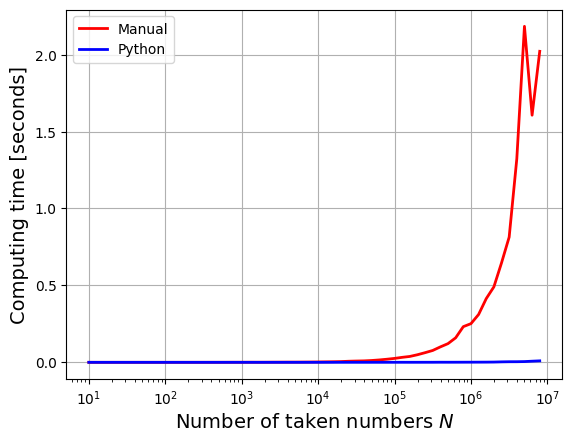

In [ ]:
#New library!!!
#Time: this library allows to access directly to the computer time.
#      Useful when time calculations are required.
import time as tm

#Maximum number of iterations
narray = 10**np.arange(1,7,0.1)

#Time arrays
t_u = []  #User
t_p = []  #Python

#Iterations
for n in narray:
    #Generating random numbers
    #N = np.random.random(n) #in python2
    N = np.random.random(int(n))
    #-------------------------------------------------------------------
    # MANUAL SUMMATION
    #-------------------------------------------------------------------
    #Starting time counter for user
    #start = tm.clock() #in python2
    start = tm.process_time()
    #Adding the numbers manually
    result = 0
    for i in range(int(n)):
        result += N[i]
    #Finishing time counter for user
    #end = tm.clock() #in python2
    end = tm.process_time()
    #Storing result
    t_u.append( end-start )

    #-------------------------------------------------------------------
    # PYTHON SUMMATION
    #-------------------------------------------------------------------
    #Starting time counter for user
    #start = tm.clock()#in python2
    start = tm.process_time()
    #Adding the numbers using python DIRECTLY
    result = np.sum( N )
    #Finishing time counter for user
    #end = tm.clock() #in python2
    end = tm.process_time()
    #Storing result
    t_p.append( end-start )

#Ploting
plt.semilogx( narray, t_u, "-", color="red", linewidth=2, label="Manual" )
plt.semilogx( narray, t_p, "-", color="blue", linewidth=2, label="Python" )
plt.xlabel("Number of taken numbers $N$", fontsize=14)
plt.ylabel("Computing time [seconds]", fontsize=14)
plt.legend()
plt.grid(True)

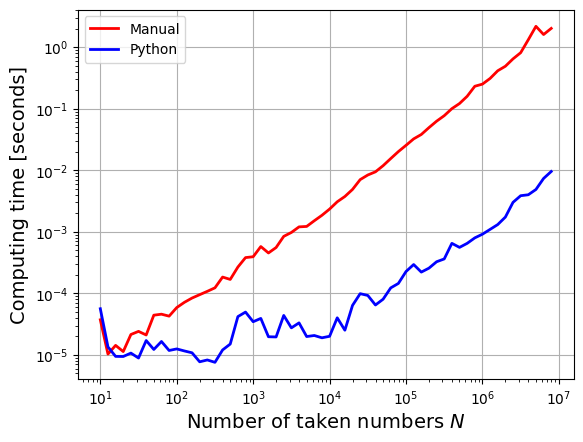

In [ ]:
#Ploting
plt.loglog( narray, t_u, "-", color="red", linewidth=2, label="Manual" )
plt.semilogx( narray, t_p, "-", color="blue", linewidth=2, label="Python" )
plt.xlabel("Number of taken numbers $N$", fontsize=14)
plt.ylabel("Computing time [seconds]", fontsize=14)
plt.legend()
plt.grid(True)

Note that in numpy sum is faster tahn hand sum.

##Exponential algorithms

This type of algorithms **scales as an exponential factor of the number of iterations**. These algorithms are usually *unstable*, where a small perturbation leads to a exponential growth after a few iterations.

**Example 3:**

Consider the recursive equation:

$$ p_n = \frac{10}{3}p_{n-1} - p_{n-2},\ \ \ \ n = 2,3,\cdots $$

the solution to this equation for $p_n$ is given by

$$ p_n = A\left( \frac{1}{3} \right)^n + B\ 3^n $$

for any constants $A$ and $B$.

Setting the initial conditions as $p_0=1$ and $p_1 = 1/3$ (implying $A=1$ and $B=0$), show that a **float32** arithmetics would lead an error scaling as the exponential of the number of iterations $n$.

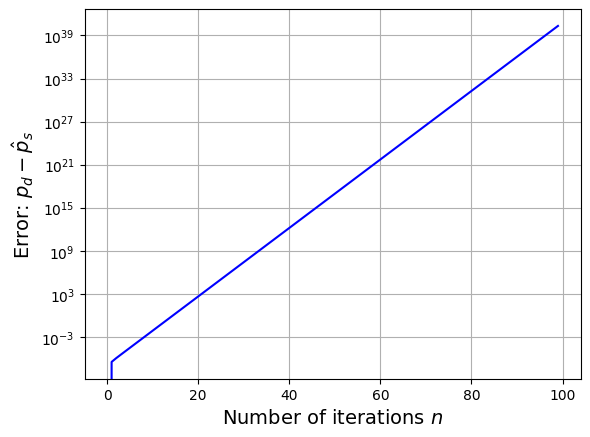

In [ ]:
#Number of iterations
Niter = 100

#Double precision constants (Exact solution)
A_d = 1.0
B_d = 0.

#Solution to n-th term
pn = lambda A, B, n: A*(3.0)**-n + B*(3.0)**n

#Arrays for storing the iterations
p_s = [1.000000,0.333333]
p_d = [1.,1/3.]

narray = range(Niter)
for n in narray[2:]:
    p_s.append( 10/3.*p_s[n-1]-p_s[n-2] )
    p_d.append( pn( A_d, B_d, n ) )

#Converting to numpy arrays
p_d = np.array(p_d)
p_s = np.array(p_s)

#Relative error
error = p_d - p_s
plt.semilogy( narray, error, "-", color="blue" )
plt.xlabel("Number of iterations $n$", fontsize=14)
plt.ylabel("Error: $p_d-\hat{p}_s$", fontsize=14)
plt.grid(True)

Note that if we begin to iterate and to do the sum manually using the list elements, the error increase a lot. If we compute the analytical expression (the solution) takes less time.

##Stable algorithms

These algorithms exhibit a small change when an initial perturbation to the initial conditions is introduced. Linear algorithms can be catalogued within this category.

##Unstable algorithms

Unlike stable algorithms, unstable algorithms produce a large change when iterating with respect to a small perturbation in the initial conditions. Exponential algorithms fit in this category.

At first glance, unstable algorithms may seem undesirable, however there are some useful applications for them. Among the more interesting ones is the generation of random numbers in a computer. [Pseudorandom number generator](http://en.wikipedia.org/wiki/Pseudorandom_number_generator)

- - -

#Computing Time

One of the most important skills a programmer must develop is to evaluate the computing time of certain process as well as the consumed memory. When computational resources are limited (as always happens!), estimating beforehand the computing time of an algorithm is certainly important.

**Example 4:**

An interesting example that illustrates very well the issue of computing time is the N-body problem.

Consider a set of $N$ masses $\{m_i\}$. The total gravitational potential energy of the $i$-th particle due to the other ones is given by

$$U_i = -G\sum_{j=1, j\neq i}^N \frac{m_i m_j}{|\vec{r}_i-\vec{r}_j|}$$

Now, if we want to calculate the total energy of the system, it is necessary to add each contribution, i.e.

$$E_{tot} = \sum_{i=1}^N U_i = \sum_{i=1}^N \left( -G\sum_{j=1, j\neq i}^N \frac{m_i m_j}{|\vec{r}_i-\vec{r}_j|} \right) $$

correction to notcount twise the same contribution $E_{12}=E_{21}$, ...

$$E_{tot} = \sum_{i=1}^N \left( -G\sum_{j>i}^N \frac{m_i m_j}{|\vec{r}_i-\vec{r}_j|} \right) $$

This implies if we want to calculate $E_{tot}$ in a computer, it is required $N(N-1)...(1)\approx N^2$ iterations, so the computing time scales as $\mathcal{O}(N^2)$. An estimation of the total time is then reached by first measuring the required time for 1 iteration, i.e., the energy of the $i$-th particle due to the $j$-th particle, and then multiplying the result by $N^2$.

The large computing time of this type of algorithms (when $N$ becomes large enough) has propelled a large enterprise of more efficient algorithms, including tree-codes where the computing time is reduced to $\mathcal{O}(N \log N)$

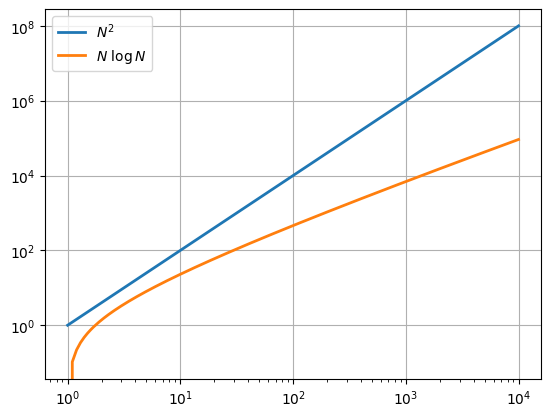

In [ ]:
N = np.arange(1,10e3,0.1)
plt.loglog( N, N**2, linewidth=2, label="$N^2$" )
plt.loglog( N, N*np.log(N), linewidth=2, label="$N\ \log N$" )
plt.legend( loc="upper left" )
plt.grid(True)

- - -

#Convergence

The last concept related to algorithms is convergence. This refers to how fast an algorithm can reach a desired result with some given precision. Some rigorous techniques can be used to quantify the convergence degree, however it is commonly a more useful approach to compare the convergence of an algorithm with other already known.

<font color='red'>
**ACTIVITY** Tarea 2
</font>

In a IPython notebook and using the codes of the first task, make a figure where is compared the values obtained for the two methods for calculating $\pi$ as a function of the number of performed iterations. Which method reaches a faster convergence?

Task (see first week): Write a program that calculates $\\pi$ by using the next approximations:,

$\frac{2}{\pi} = \frac{\sqrt{2}}{2}\times \frac{\sqrt{2+\sqrt{2}}}{2}\times \frac{\sqrt{2+\sqrt{2+\sqrt{2}}}}{2}\times \cdots$
     
and,
   
$\frac{\pi}{4} = 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} - \frac{1}{11} + \cdots$,
  
Which approximation takes less terms for achieving a good accuracy?

- - -